In [ ]:
#Carregandos bibliotecas importantes para a atividade
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
#plt.figure(figsize=(largura, altura))
plt.rcParams["figure.figsize"] = (12, 8)

import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.float_format', lambda x: '%.3f' % x)

import io, os

import missingno as miss

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

from pprint import pprint
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import train_test_split, cross_val_predict, KFold,cross_val_score

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,ConfusionMatrixDisplay, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

# from imblearn.over_sampling import SMOTE
# from imblearn.over_sampling import RandomOverSampler
# from imblearn.pipeline import Pipeline

from google.colab import drive

In [ ]:
#Montando o drive para carregar o arquivo
GOOGLE_COLAB = "google.colab" in str(get_ipython())

if GOOGLE_COLAB:
    from google.colab import drive
    drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
drive = '/content/drive/MyDrive/Mestrado/ids_datasets/CIC-IDS2017/IDS2017/'

In [ ]:
csvs = os.listdir(drive)
csvs

['Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
 'Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
 'Friday-WorkingHours-Morning.pcap_ISCX.csv',
 'Monday-WorkingHours.pcap_ISCX.csv',
 'Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
 'Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
 'Tuesday-WorkingHours.pcap_ISCX.csv',
 'Wednesday-workingHours.pcap_ISCX.csv']

In [ ]:
total_rows=0
for csv in csvs:
    data = pd.read_csv(drive + csv)
    total_rows+=len(data)
    print(f'O arquivo {csv} tem {data.shape[0]} linhas e {data.shape[1]} colunas.')
    print(f'Total esperado de linhas: {total_rows}')

O arquivo Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv tem 225745 linhas e 79 colunas.
Total esperado de linhas: 225745
O arquivo Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv tem 286467 linhas e 79 colunas.
Total esperado de linhas: 512212
O arquivo Friday-WorkingHours-Morning.pcap_ISCX.csv tem 191033 linhas e 79 colunas.
Total esperado de linhas: 703245
O arquivo Monday-WorkingHours.pcap_ISCX.csv tem 529918 linhas e 79 colunas.
Total esperado de linhas: 1233163
O arquivo Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv tem 288602 linhas e 79 colunas.
Total esperado de linhas: 1521765
O arquivo Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv tem 170366 linhas e 79 colunas.
Total esperado de linhas: 1692131
O arquivo Tuesday-WorkingHours.pcap_ISCX.csv tem 445909 linhas e 79 colunas.
Total esperado de linhas: 2138040
O arquivo Wednesday-workingHours.pcap_ISCX.csv tem 692703 linhas e 79 colunas.
Total esperado de linhas: 2830743


In [ ]:
# Assuming 'drive' is the directory path
file_path1 = os.path.join(drive, 'Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
file_path2 = os.path.join(drive, 'Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
file_path3 = os.path.join(drive,'Friday-WorkingHours-Morning.pcap_ISCX.csv')
# file_path4 = os.path.join(drive,'Monday-WorkingHours.pcap_ISCX.csv')
# file_path5 = os.path.join(drive, 'Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
# file_path6 = os.path.join(drive,'Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
# file_path7 = os.path.join(drive,'Tuesday-WorkingHours.pcap_ISCX.csv')
# file_path8 = os.path.join(drive,'Wednesday-workingHours.pcap_ISCX.csv')

In [ ]:
# Read the CSV and replace 'inf' and '-inf' with NaN
df1 = pd.read_csv(file_path1, na_values=['inf', '-inf'])
df2 = pd.read_csv(file_path2, na_values=['inf', '-inf'])
df3 = pd.read_csv(file_path3, na_values=['inf', '-inf'])
# df4 = pd.read_csv(file_path4, na_values=['inf', '-inf'])
# df5 = pd.read_csv(file_path5, na_values=['inf', '-inf'])
# df6 = pd.read_csv(file_path6, na_values=['inf', '-inf'])
# df7 = pd.read_csv(file_path7, na_values=['inf', '-inf'])
# df8 = pd.read_csv(file_path8, na_values=['inf', '-inf'])

In [ ]:
# Extrair nomes das colunas de cada DataFrame
colunas_df1 = set(df1.columns)
colunas_df2 = set(df2.columns)
colunas_df3 = set(df3.columns)
# colunas_df4 = set(df4.columns)
# colunas_df5 = set(df5.columns)
# colunas_df6 = set(df6.columns)
# colunas_df7 = set(df7.columns)
# colunas_df8 = set(df8.columns)


# Verificar se os nomes das colunas são os mesmos
# if colunas_df1 == colunas_df2 == colunas_df3 == colunas_df4 == colunas_df5 ==colunas_df6 == colunas_df7 == colunas_df8:
if colunas_df1 == colunas_df2 == colunas_df3:
    print("Todos os arquivos têm os mesmos nomes de colunas.")
else:
    print("Os arquivos têm nomes de colunas diferentes.")

    # Mostrar diferenças
    print("Colunas em arquivo1 e não em arquivo2:", colunas_df1 - colunas_df2)
    print("Colunas em arquivo2 e não em arquivo3:", colunas_df2 - colunas_df3)
    # print("Colunas em arquivo3 e não em arquivo1:", colunas_df3 - colunas_df4)
    # print("Colunas em arquivo1 e não em arquivo2:", colunas_df4- colunas_df5)
    # print("Colunas em arquivo2 e não em arquivo3:", colunas_df5 - colunas_df6)
    # print("Colunas em arquivo3 e não em arquivo1:", colunas_df6 - colunas_df7)
    # print("Colunas em arquivo3 e não em arquivo1:", colunas_df7 - colunas_df8)

Todos os arquivos têm os mesmos nomes de colunas.


# Etapa de Concatenação






In [ ]:
# df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8], ignore_index=True)
df = pd.concat([df1, df2, df3], ignore_index=True)
df.shape

(703245, 79)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 703245 entries, 0 to 703244
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             703245 non-null  int64  
 1    Flow Duration                703245 non-null  int64  
 2    Total Fwd Packets            703245 non-null  int64  
 3    Total Backward Packets       703245 non-null  int64  
 4   Total Length of Fwd Packets   703245 non-null  int64  
 5    Total Length of Bwd Packets  703245 non-null  int64  
 6    Fwd Packet Length Max        703245 non-null  int64  
 7    Fwd Packet Length Min        703245 non-null  int64  
 8    Fwd Packet Length Mean       703245 non-null  float64
 9    Fwd Packet Length Std        703245 non-null  float64
 10  Bwd Packet Length Max         703245 non-null  int64  
 11   Bwd Packet Length Min        703245 non-null  int64  
 12   Bwd Packet Length Mean       703245 non-nul

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Destination Port,2830743.000,8071.483,18283.632,0.000,53.000,80.000,443.000,65535.000
Flow Duration,2830743.000,14785663.930,33653744.086,-13.000,155.000,31316.000,3204828.500,119999998.000
Total Fwd Packets,2830743.000,9.361,749.673,1.000,2.000,2.000,5.000,219759.000
Total Backward Packets,2830743.000,10.394,997.388,0.000,1.000,2.000,4.000,291922.000
Total Length of Fwd Packets,2830743.000,549.302,9993.589,0.000,12.000,62.000,187.000,12900000.000
...,...,...,...,...,...,...,...,...
Active Min,2830743.000,58295.818,577092.282,0.000,0.000,0.000,0.000,110000000.000
Idle Mean,2830743.000,8316036.627,23630078.578,0.000,0.000,0.000,0.000,120000000.000
Idle Std,2830743.000,503843.950,4602984.481,0.000,0.000,0.000,0.000,76900000.000
Idle Max,2830743.000,8695751.985,24366888.329,0.000,0.000,0.000,0.000,120000000.000


# Início de Pré-processamento e limpeza

In [ ]:
print(df.duplicated().sum())

87351


In [ ]:
#remove duplicates without first occurrence
df.drop_duplicates(keep='first',inplace=True)

In [ ]:
print(df.duplicated().sum())

0


In [ ]:
# Lista para armazenar nomes das colunas que estão completamente vazias
empty_cols=[]

# Itera sobre cada coluna do dataframe
for col in df.columns:
  if df[col].isnull().all():
    empty_cols.append(col)
    if len(empty_cols == []):
      df.fillna(0, inplace=True)

print(f'Colunas vazias: {empty_cols}')

Colunas vazias: []


In [ ]:
nan_count = df.isna().any(axis=1).sum()
print(f"Número de linhas com pelo menos um NaN: {nan_count}")

Número de linhas com pelo menos um NaN: 461


In [ ]:
# Contar o número de NaN por coluna
nan_count_per_column = df.isna().sum()
print("Número de NaN por coluna:")
print(nan_count_per_column)

Número de NaN por coluna:
 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64


In [ ]:
df = df.dropna(axis=0, how='any')

In [ ]:
# # Ensure no infinite values remain
# df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
# Final check
print("Total NaN after conversion:", df.isna().sum().sum())

Total NaN after conversion: 0


In [ ]:
df = df.loc[:, df.nunique() > 1]

In [ ]:
len(df.columns)

69

# Missing Values and the Percentage of Missing Values

In [ ]:
missing_data = df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_data["% of Missing Values"] = round((missing_data["Total No. of Missing Values"]/len(df))*100,2)
missing_data

,Total No. of Missing Values,% of Missing Values
Destination Port,0,0.000
Flow Duration,0,0.000
Total Fwd Packets,0,0.000
Total Backward Packets,0,0.000
Total Length of Fwd Packets,0,0.000
...,...,...
Idle Mean,0,0.000
Idle Std,0,0.000
Idle Max,0,0.000
Idle Min,0,0.000


# Corrigindo os nomes das colunas

In [ ]:
print(df.columns.tolist()) # Check exact column names

[' Destination Port', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count', ' ACK Flag Count', ' URG Flag Count', ' ECE Flag Count', ' Down/Up Ratio', ' Average

In [ ]:
df.columns = df.columns.str.strip()  # Remove extra spaces
df.columns = df.columns.str.lower()
print(df.columns.tolist())  # Check the exact column name

['destination port', 'flow duration', 'total fwd packets', 'total backward packets', 'total length of fwd packets', 'total length of bwd packets', 'fwd packet length max', 'fwd packet length min', 'fwd packet length mean', 'fwd packet length std', 'bwd packet length max', 'bwd packet length min', 'bwd packet length mean', 'bwd packet length std', 'flow bytes/s', 'flow packets/s', 'flow iat mean', 'flow iat std', 'flow iat max', 'flow iat min', 'fwd iat total', 'fwd iat mean', 'fwd iat std', 'fwd iat max', 'fwd iat min', 'bwd iat total', 'bwd iat mean', 'bwd iat std', 'bwd iat max', 'bwd iat min', 'fwd psh flags', 'fwd header length', 'bwd header length', 'fwd packets/s', 'bwd packets/s', 'min packet length', 'max packet length', 'packet length mean', 'packet length std', 'packet length variance', 'fin flag count', 'syn flag count', 'rst flag count', 'psh flag count', 'ack flag count', 'urg flag count', 'ece flag count', 'down/up ratio', 'average packet size', 'avg fwd segment size', 'a

# Checando valores únicos de atributos categoricos e numéricos

In [ ]:
def unique_vals(df, columns):
  for col_name in columns:
    print(f"Colunas: {col_name}\n{'-'*30}")
    unique_vals = df[col_name].unique()
    len_unique_vals = len(unique_vals)
    value_counts = df[col_name].value_counts()

    print(f'Valores Unicos: {len_unique_vals}\n')
    print(f"Value Counts: {value_counts}\n{'='*40}\n")

columns = df.columns.to_list()
unique_vals(df, columns)

Colunas: destination port
------------------------------
Valores Unicos: 53804

Value Counts: destination port
53       876884
80       542302
443      470436
123       21334
22        10334
          ...  
21620         1
19462         1
41943         1
16669         1
18390         1
Name: count, Length: 53804, dtype: int64

Colunas: flow duration
------------------------------
Valores Unicos: 1050899

Value Counts: flow duration
3            51741
4            30734
1            15120
49           10584
48           10412
             ...  
115760185        1
116560146        1
116560260        1
115449314        1
75451            1
Name: count, Length: 1050899, dtype: int64

Colunas: total fwd packets
------------------------------
Valores Unicos: 1432

Value Counts: total fwd packets
2       858562
1       614325
3       201715
4       126131
5        87588
         ...  
585          1
1598         1
1657         1
2791         1
2794         1
Name: count, Length: 1432, dtype: 

In [ ]:
categ_feat = df.select_dtypes(include=['object']).columns
unique_vals(df, categ_feat)

Colunas: label
------------------------------
Valores Unicos: 15

Value Counts: label
BENIGN                        2096134
DoS Hulk                       172846
DDoS                           128016
PortScan                        90819
DoS GoldenEye                   10286
FTP-Patator                      5933
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
Bot                              1953
Web Attack � Brute Force         1470
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64



In [ ]:
list_feat=[]
for feats in categ_feat:
  list_feat.append(feats)
  len_feat = len(list_feat)

print(f'Atributos categóricos: {list_feat}\n')
print(f'Tamanho: {len_feat}')

Atributos categóricos: ['label']

Tamanho: 1


In [ ]:
numeric_feats = df.select_dtypes(include=['float64', 'int64']).columns
unique_vals(df, numeric_feats)

Colunas: destination port
------------------------------
Valores Unicos: 53804

Value Counts: destination port
53       876884
80       542302
443      470436
123       21334
22        10334
          ...  
21620         1
19462         1
41943         1
16669         1
18390         1
Name: count, Length: 53804, dtype: int64

Colunas: flow duration
------------------------------
Valores Unicos: 1050899

Value Counts: flow duration
3            51741
4            30734
1            15120
49           10584
48           10412
             ...  
115760185        1
116560146        1
116560260        1
115449314        1
75451            1
Name: count, Length: 1050899, dtype: int64

Colunas: total fwd packets
------------------------------
Valores Unicos: 1432

Value Counts: total fwd packets
2       858562
1       614325
3       201715
4       126131
5        87588
         ...  
585          1
1598         1
1657         1
2791         1
2794         1
Name: count, Length: 1432, dtype: 

In [ ]:
list_feat_num=[]
for feats in numeric_feats:
  list_feat_num.append(feats)
  len_feat_num = len(list_feat_num)

print(f'Atributos numéricos: {list_feat_num}\n')
print(f'Tamanho: {len_feat_num}')

Atributos numéricos: ['destination port', 'flow duration', 'total fwd packets', 'total backward packets', 'total length of fwd packets', 'total length of bwd packets', 'fwd packet length max', 'fwd packet length min', 'fwd packet length mean', 'fwd packet length std', 'bwd packet length max', 'bwd packet length min', 'bwd packet length mean', 'bwd packet length std', 'flow bytes/s', 'flow packets/s', 'flow iat mean', 'flow iat std', 'flow iat max', 'flow iat min', 'fwd iat total', 'fwd iat mean', 'fwd iat std', 'fwd iat max', 'fwd iat min', 'bwd iat total', 'bwd iat mean', 'bwd iat std', 'bwd iat max', 'bwd iat min', 'fwd psh flags', 'fwd urg flags', 'fwd header length', 'bwd header length', 'fwd packets/s', 'bwd packets/s', 'min packet length', 'max packet length', 'packet length mean', 'packet length std', 'packet length variance', 'fin flag count', 'syn flag count', 'rst flag count', 'psh flag count', 'ack flag count', 'urg flag count', 'cwe flag count', 'ece flag count', 'down/up r

In [ ]:
df.head(10)

,destination port,flow duration,total fwd packets,total backward packets,total length of fwd packets,total length of bwd packets,fwd packet length max,fwd packet length min,fwd packet length mean,fwd packet length std,...,min_seg_size_forward,active mean,active std,active max,active min,idle mean,idle std,idle max,idle min,label
0,54865,3,2,0,12,0,6,6,6.000,0.000,...,20,0.000,0.000,0,0,0.000,0.000,0,0,0
1,55054,109,1,1,6,6,6,6,6.000,0.000,...,20,0.000,0.000,0,0,0.000,0.000,0,0,0
2,55055,52,1,1,6,6,6,6,6.000,0.000,...,20,0.000,0.000,0,0,0.000,0.000,0,0,0
3,46236,34,1,1,6,6,6,6,6.000,0.000,...,20,0.000,0.000,0,0,0.000,0.000,0,0,0
4,54863,3,2,0,12,0,6,6,6.000,0.000,...,20,0.000,0.000,0,0,0.000,0.000,0,0,0
5,54871,1022,2,0,12,0,6,6,6.000,0.000,...,20,0.000,0.000,0,0,0.000,0.000,0,0,0
6,54925,4,2,0,12,0,6,6,6.000,0.000,...,20,0.000,0.000,0,0,0.000,0.000,0,0,0
7,54925,42,1,1,6,6,6,6,6.000,0.000,...,20,0.000,0.000,0,0,0.000,0.000,0,0,0
8,9282,4,2,0,12,0,6,6,6.000,0.000,...,20,0.000,0.000,0,0,0.000,0.000,0,0,0
9,55153,4,2,0,37,0,31,6,18.500,17.678,...,20,0.000,0.000,0,0,0.000,0.000,0,0,0


In [ ]:
df['label'].unique()

array(['BENIGN', 'DDoS', 'PortScan', 'Bot'], dtype=object)

In [ ]:
df['label'] = df['label'].apply(lambda x: 0 if x == 'BENIGN' else 1)

In [ ]:
df['label'].unique()

array([0, 1])

In [ ]:
df_label_count = df.groupby('label').size().reset_index(name='count')
df_label_count.columns = ['label', 'count']

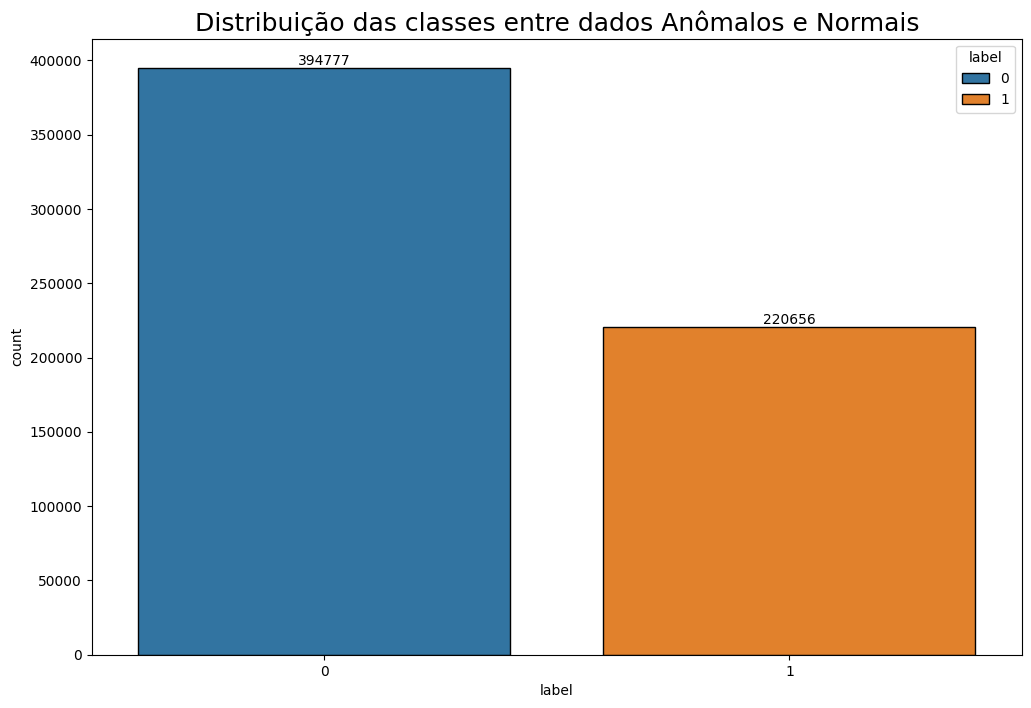

In [ ]:
ax = sns.barplot(
    data = df_label_count,
    x= 'label',
    y= 'count',
    hue= 'label',
    edgecolor='black')

ax.set_title('Distribuição das classes entre dados Anômalos e Normais',
          fontdict={'fontsize':18})

for container in ax.containers:
   ax.bar_label(container)

In [ ]:
count_val0 = df_label_count[df_label_count['label'] == 0]['count'].iloc[0]
count_val1 = df_label_count[df_label_count['label'] == 1]['count'].iloc[0]

print(f'Proporção de Classes:\n')
print(f'Instâncias normais: {count_val0/len(df)*100:.2f}%')
print(f'Instâncias anômalas: {count_val1/len(df)*100:.2f}%')

Proporção de Classes:

Instâncias normais: 64.15%
Instâncias anômalas: 35.85%


In [ ]:
# # check data imbalance
# attackcat_counts = df['label'].value_counts()
# attackcat_counts

# from imblearn.over_sampling import SMOTE

# # Separate features and target variable
# X = df.drop('label', axis=1)
# y = df['label']

# # Initialize SMOTE
# smote = SMOTE(random_state=42)

# # Perform oversampling
# X_resampled, y_resampled = smote.fit_resample(X, y)

# # Create a new DataFrame with oversampled data
# final_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='label')], axis=1)

# # check data imbalance again
# attackcat_counts = final_df['label'].value_counts()
# attackcat_counts

ValueError: Input X contains infinity or a value too large for dtype('float64').

#Reducao do tamanho do dataset em termos de MP

In [ ]:
from pandas.api.types import is_datetime64_any_dtype as is_datetime
from pandas.api.types import is_categorical_dtype

def reduce_mem_usage(df, use_float16=False):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        if is_datetime(df[col]) or is_categorical_dtype(df[col]):
            # skip datetime type or categorical type
            continue
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if use_float16 and c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('object')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [ ]:
df = reduce_mem_usage(df)

Memory usage of dataframe is 328.68 MB
Memory usage after optimization is: 140.27 MB
Decreased by 57.3%


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2522009 entries, 0 to 2830742
Data columns (total 71 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   destination port             int32  
 1   flow duration                int32  
 2   total fwd packets            int32  
 3   total backward packets       int32  
 4   total length of fwd packets  int32  
 5   total length of bwd packets  int32  
 6   fwd packet length max        int16  
 7   fwd packet length min        int16  
 8   fwd packet length mean       float32
 9   fwd packet length std        float32
 10  bwd packet length max        int16  
 11  bwd packet length min        int16  
 12  bwd packet length mean       float32
 13  bwd packet length std        float32
 14  flow bytes/s                 float64
 15  flow packets/s               float64
 16  flow iat mean                float32
 17  flow iat std                 float32
 18  flow iat max                 int32  
 19  flow 

#Checking for Highly Correlated Feature

In [ ]:
df_corr = df

In [ ]:
# Calculate the correlation matrix
corr_matrix = df_corr.corr()

# Create a mask to identify the features with a correlation coefficient greater than or equal to 0.75
high_correlation_mask = corr_matrix >= 0.75

# Identify and list the highly correlated features
highly_correlated_features = []

for feature in high_correlation_mask.columns:
    correlated_with = high_correlation_mask.index[high_correlation_mask[feature]].tolist()
    for correlated_feature in correlated_with:
        if feature != correlated_feature and (correlated_feature, feature) not in highly_correlated_features:
            highly_correlated_features.append((feature, correlated_feature))

# Print the highly correlated features
print("Highly correlated features:")
for feature1, feature2 in highly_correlated_features:
    print(f"{feature1} and {feature2}")

Highly correlated features:
flow duration and flow iat max
flow duration and fwd iat total
flow duration and fwd iat max
flow duration and bwd iat total
flow duration and idle mean
flow duration and idle max
total fwd packets and total backward packets
total fwd packets and total length of bwd packets
total fwd packets and fwd header length
total fwd packets and bwd header length
total fwd packets and fwd header length.1
total fwd packets and subflow fwd packets
total fwd packets and subflow bwd packets
total fwd packets and subflow bwd bytes
total fwd packets and act_data_pkt_fwd
total backward packets and total length of bwd packets
total backward packets and fwd header length
total backward packets and bwd header length
total backward packets and fwd header length.1
total backward packets and subflow fwd packets
total backward packets and subflow bwd packets
total backward packets and subflow bwd bytes
total backward packets and act_data_pkt_fwd
total length of fwd packets and subfl

#Dropping High correlated

In [ ]:
# Create a set of features to drop
features_to_drop = set()

# Iterate over the highly correlated features and add one of each pair to the drop list
for feature1, feature2 in highly_correlated_features:
    if feature1 not in features_to_drop and feature2 not in features_to_drop:
        features_to_drop.add(feature2)  # You can choose feature1 or feature2 to drop

In [ ]:
features_to_drop

{'act_data_pkt_fwd',
 'active max',
 'active min',
 'average packet size',
 'avg bwd segment size',
 'avg fwd segment size',
 'bwd header length',
 'bwd iat max',
 'bwd iat mean',
 'bwd iat total',
 'bwd packet length mean',
 'bwd packet length std',
 'ece flag count',
 'flow iat max',
 'flow iat std',
 'fwd header length',
 'fwd header length.1',
 'fwd iat max',
 'fwd iat mean',
 'fwd iat min',
 'fwd iat total',
 'fwd packet length mean',
 'fwd packet length std',
 'fwd packets/s',
 'idle max',
 'idle mean',
 'max packet length',
 'min packet length',
 'packet length mean',
 'packet length std',
 'packet length variance',
 'subflow bwd bytes',
 'subflow bwd packets',
 'subflow fwd bytes',
 'subflow fwd packets',
 'syn flag count',
 'total backward packets',
 'total length of bwd packets'}

In [ ]:
# Drop the features from the DataFrame
df= df.drop(columns=features_to_drop)

# Print the remaining features
print("Remaining features after dropping highly correlated ones:")
print(df.columns)

Remaining features after dropping highly correlated ones:
Index(['destination port', 'flow duration', 'total fwd packets',
       'total length of fwd packets', 'fwd packet length max',
       'fwd packet length min', 'bwd packet length max',
       'bwd packet length min', 'flow bytes/s', 'flow packets/s',
       'flow iat mean', 'flow iat min', 'fwd iat std', 'bwd iat std',
       'bwd iat min', 'fwd psh flags', 'bwd packets/s', 'fin flag count',
       'rst flag count', 'psh flag count', 'ack flag count', 'urg flag count',
       'down/up ratio', 'init_win_bytes_forward', 'init_win_bytes_backward',
       'min_seg_size_forward', 'active mean', 'active std', 'idle std',
       'idle min', 'label'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2522009 entries, 0 to 2830742
Data columns (total 34 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   destination port             int32  
 1   flow duration                int32  
 2   total fwd packets            int32  
 3   total length of fwd packets  int32  
 4   fwd packet length max        int16  
 5   fwd packet length min        int16  
 6   bwd packet length max        int16  
 7   bwd packet length min        int16  
 8   flow bytes/s                 float64
 9   flow packets/s               float64
 10  flow iat mean                float32
 11  flow iat std                 float32
 12  flow iat min                 int32  
 13  bwd iat mean                 float32
 14  bwd iat std                  float32
 15  fwd psh flags                int8   
 16  fwd urg flags                int8   
 17  fwd header length            int64  
 18  bwd header length            int32  
 19  bwd p

In [ ]:
# # Convert all columns to numeric, forcing invalid values to NaN
# df = df.apply(pd.to_numeric, errors='coerce')

In [ ]:
# # Final check
# print("Total NaN after conversion:", df.isna().sum().sum())

Total NaN after conversion: 0


In [ ]:
# # Ensure everything is finite
# assert np.all(np.isfinite(df.to_numpy())), "Data still contains invalid values!"

#Best Features

In [ ]:
X = df.drop(["label"], axis=1)
y = df["label"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
train_index = X_train.columns
train_index

Index(['destination port', 'flow duration', 'total fwd packets',
       'total length of fwd packets', 'fwd packet length max',
       'fwd packet length min', 'bwd packet length max',
       'bwd packet length min', 'flow bytes/s', 'flow packets/s',
       'flow iat mean', 'flow iat min', 'fwd iat std', 'bwd iat std',
       'bwd iat min', 'fwd psh flags', 'bwd packets/s', 'fin flag count',
       'rst flag count', 'psh flag count', 'ack flag count', 'urg flag count',
       'down/up ratio', 'init_win_bytes_forward', 'init_win_bytes_backward',
       'min_seg_size_forward', 'active mean', 'active std', 'idle std',
       'idle min'],
      dtype='object')

# Check for inf or -inf Values

In [ ]:
# Convert all columns to numeric, forcing invalid values to NaN
df = df.apply(pd.to_numeric, errors='coerce')

In [ ]:
# Final check
print("Total NaN after conversion:", df.isna().sum().sum())

Total NaN after conversion: 0


In [ ]:
# Ensure everything is finite
assert np.all(np.isfinite(df.to_numpy())), "Data still contains invalid values!"

In [ ]:
# Check for infinities
print("Number of inf values:", np.isinf(X).sum())

Number of inf values: destination port               0
flow duration                  0
total fwd packets              0
total length of fwd packets    0
fwd packet length max          0
fwd packet length min          0
bwd packet length max          0
bwd packet length min          0
flow bytes/s                   0
flow packets/s                 0
flow iat mean                  0
flow iat min                   0
fwd iat std                    0
bwd iat std                    0
bwd iat min                    0
fwd psh flags                  0
bwd packets/s                  0
fin flag count                 0
rst flag count                 0
psh flag count                 0
ack flag count                 0
urg flag count                 0
down/up ratio                  0
init_win_bytes_forward         0
init_win_bytes_backward        0
min_seg_size_forward           0
active mean                    0
active std                     0
idle std                       0
idle min             

In [ ]:
# Check for NaN values (they can also cause issues)
print("Number of NaN values:", np.isnan(X).sum())

Number of NaN values: destination port               0
flow duration                  0
total fwd packets              0
total length of fwd packets    0
fwd packet length max          0
fwd packet length min          0
bwd packet length max          0
bwd packet length min          0
flow bytes/s                   0
flow packets/s                 0
flow iat mean                  0
flow iat min                   0
fwd iat std                    0
bwd iat std                    0
bwd iat min                    0
fwd psh flags                  0
bwd packets/s                  0
fin flag count                 0
rst flag count                 0
psh flag count                 0
ack flag count                 0
urg flag count                 0
down/up ratio                  0
init_win_bytes_forward         0
init_win_bytes_backward        0
min_seg_size_forward           0
active mean                    0
active std                     0
idle std                       0
idle min             

In [ ]:
# Check max and min values to see if they're too large
print("Max value:", np.max(X))
print("Min value:", np.min(X))

Max value: 2070000000.0
Min value: -193000000.0


#Fix inf or NaN Values

Replace inf and -inf values with NaN, then replace NaN with a safe value (like 0 or the column mean):

In [ ]:
# X = np.where(np.isinf(X), np.nan, X)  # Convert inf to NaN
# X = np.nan_to_num(X, nan=0.0)  # Replace NaN with 0

Alternatively, replace inf values with the maximum possible finite float value:

In [ ]:
# X = np.where(np.isinf(X), np.finfo(np.float64).max, X)

Make sure X is explicitly in float64 format:

In [ ]:
# X = X.astype(np.float64)

In [ ]:
# print("Number of +inf values:", np.sum(np.isinf(X) & (X > 0)))
# print("Number of -inf values:", np.sum(np.isinf(X) & (X < 0)))
# print("Number of NaN values:", np.isnan(X).sum())

Number of +inf values: destination port               0
flow duration                  0
total fwd packets              0
total length of fwd packets    0
fwd packet length max          0
fwd packet length min          0
bwd packet length max          0
bwd packet length min          0
flow bytes/s                   0
flow packets/s                 0
flow iat mean                  0
flow iat std                   0
flow iat min                   0
bwd iat mean                   0
bwd iat std                    0
fwd psh flags                  0
fwd urg flags                  0
fwd header length              0
bwd header length              0
bwd packets/s                  0
min packet length              0
fin flag count                 0
rst flag count                 0
psh flag count                 0
ack flag count                 0
urg flag count                 0
down/up ratio                  0
init_win_bytes_forward         0
init_win_bytes_backward        0
min_seg_size_forward

Make sure all values in X are finite:

In [ ]:
# assert np.all(np.isfinite(X)), "X still contains non-finite values!"

In [ ]:
# X = np.log(X)  # Ensure no negatives before this
# X = np.exp(X)  # Avoid exp(1000) which becomes inf


In [ ]:
# print(X.dtype)  # Check if it's float64
# X = X.astype(np.float64)  # Convert if necessary

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [ ]:
assert np.all(np.isfinite(X)), "X still contains invalid values!"
print("X is now valid!")

X is now valid!


In [ ]:
# print("Total elements in X:", X.size)
# print("Number of NaN values:", np.isnan(X).sum())
# print("Number of +inf values:", np.sum(np.isinf(X) & (X > 0)))
# print("Number of -inf values:", np.sum(np.isinf(X) & (X < 0)))

Total elements in X: 83186334
Number of NaN values: destination port               0
flow duration                  0
total fwd packets              0
total length of fwd packets    0
fwd packet length max          0
fwd packet length min          0
bwd packet length max          0
bwd packet length min          0
flow bytes/s                   0
flow packets/s                 0
flow iat mean                  0
flow iat std                   0
flow iat min                   0
bwd iat mean                   0
bwd iat std                    0
fwd psh flags                  0
fwd urg flags                  0
fwd header length              0
bwd header length              0
bwd packets/s                  0
min packet length              0
fin flag count                 0
rst flag count                 0
psh flag count                 0
ack flag count                 0
urg flag count                 0
down/up ratio                  0
init_win_bytes_forward         0
init_win_bytes_backward 

In [ ]:
# X = np.where(np.isinf(X), np.nan, X)  # Convert inf to NaN
# X = np.nan_to_num(X, nan=0.0)  # Replace NaN with 0

In [ ]:
# X = np.where(np.isinf(X), np.finfo(np.float64).max, X)


In [ ]:
# X = X[np.all(np.isfinite(X), axis=1)]


In [ ]:
# assert np.all(np.isfinite(X)), "X still contains invalid values!"
# print("X is now valid!")

X is now valid!


In [ ]:
# print(np.where(np.isinf(X)))  # Find locations of inf values
# print(np.where(np.isnan(X)))  # Find locations of NaN values


(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


In [ ]:
# print("X dtype:", X.dtype)


AttributeError: 'DataFrame' object has no attribute 'dtype'

In [ ]:
print("Max absolute value:", np.max(np.abs(X)))
print("Largest finite float:", np.finfo(np.float64).max)


Max absolute value: 2070000000.0
Largest finite float: 1.7976931348623157e+308


In [ ]:
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = train_index
mutual_info.sort_values(ascending=False)

,0
total length of fwd packets,0.522
destination port,0.465
fwd packet length max,0.441
init_win_bytes_forward,0.410
bwd packet length max,0.363
init_win_bytes_backward,0.318
flow bytes/s,0.300
flow duration,0.270
bwd packets/s,0.250
min_seg_size_forward,0.242


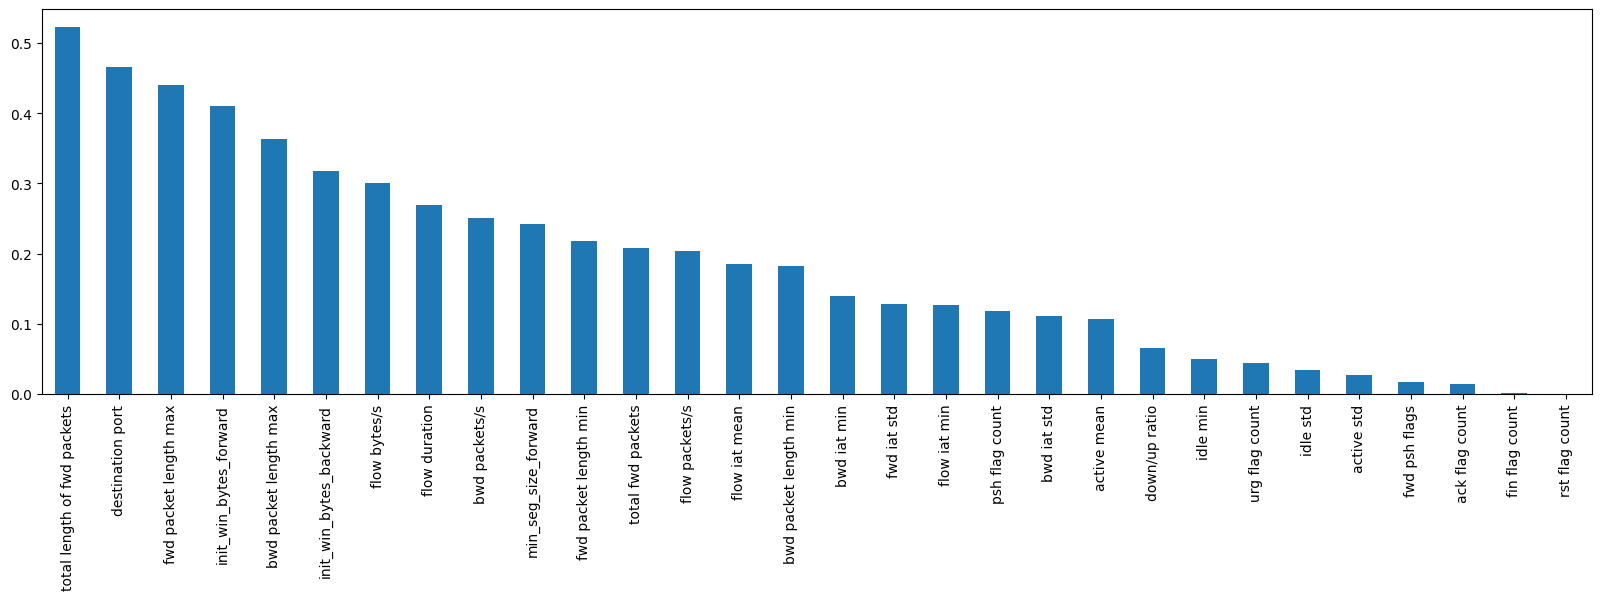

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 5));

In [ ]:
mutual_info_sorted_features = mutual_info.sort_values(ascending=False).index.tolist()
print(mutual_info_sorted_features)

['total length of fwd packets', 'destination port', 'fwd packet length max', 'init_win_bytes_forward', 'bwd packet length max', 'init_win_bytes_backward', 'flow bytes/s', 'flow duration', 'bwd packets/s', 'min_seg_size_forward', 'fwd packet length min', 'total fwd packets', 'flow packets/s', 'flow iat mean', 'bwd packet length min', 'bwd iat min', 'fwd iat std', 'flow iat min', 'psh flag count', 'bwd iat std', 'active mean', 'down/up ratio', 'idle min', 'urg flag count', 'idle std', 'active std', 'fwd psh flags', 'ack flag count', 'fin flag count', 'rst flag count']


# DF com as 20 melhores features do mutual_info incluindo label

In [ ]:
# mutual_info = ['total length of fwd packets', 'bwd packet length max', 'destination port', 'init_win_bytes_backward', 'init_win_bytes_forward', 'fwd packet length max', 'flow duration', 'flow bytes/s', 'fwd header length', 'bwd packets/s', 'bwd header length', 'flow packets/s', 'flow iat mean', 'flow iat std', 'down/up ratio', 'active mean', 'bwd iat mean', 'total fwd packets', 'bwd iat std', 'min packet length', 'fwd packet length min', 'bwd packet length min', 'ack flag count', 'psh flag count', 'flow iat min', 'min_seg_size_forward', 'urg flag count', 'fin flag count', 'idle std', 'active std', 'fwd psh flags', 'fwd urg flags', 'rst flag count', 'label']


In [ ]:
mutual_info = ['total length of fwd packets', 'destination port', 'fwd packet length max', 'init_win_bytes_forward', 'bwd packet length max', 'init_win_bytes_backward', 'flow bytes/s', 'flow duration', 'bwd packets/s', 'min_seg_size_forward', 'fwd packet length min', 'total fwd packets', 'flow packets/s', 'flow iat mean', 'bwd packet length min', 'bwd iat min', 'fwd iat std', 'flow iat min', 'psh flag count', 'label']


In [ ]:
df = df[mutual_info]

In [ ]:
len(df)

615433

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 615433 entries, 0 to 703244
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   total length of fwd packets  615433 non-null  int32  
 1   destination port             615433 non-null  int32  
 2   fwd packet length max        615433 non-null  int16  
 3   init_win_bytes_forward       615433 non-null  int32  
 4   bwd packet length max        615433 non-null  int16  
 5   init_win_bytes_backward      615433 non-null  int32  
 6   flow bytes/s                 615433 non-null  float32
 7   flow duration                615433 non-null  int32  
 8   bwd packets/s                615433 non-null  float32
 9   min_seg_size_forward         615433 non-null  int8   
 10  fwd packet length min        615433 non-null  int16  
 11  total fwd packets            615433 non-null  int32  
 12  flow packets/s               615433 non-null  float32
 13  flow

# Etapa de geracao de dataset para HDC

In [ ]:
# Dividir em chunks
chunk_size = len(df)  # Número de linhas por chunk
for i, chunk in enumerate(range(0, len(df), chunk_size)):
    df.iloc[chunk:chunk+chunk_size].to_csv(f"/content/drive/MyDrive/Mestrado/ids_datasets/CIC-IDS2017/dataset_hdc/cic_ids2017.csv", index=False)

#Etapa de *Padronização*

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
X = df.drop(["label"], axis=1)
y = df["label"]

In [ ]:
scale = StandardScaler()
# scale = MinMaxScaler()
scale.fit(X)
X_scaled = scale.transform(X)
X_scale_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scale_df

,total length of fwd packets,destination port,fwd packet length max,init_win_bytes_forward,bwd packet length max,init_win_bytes_backward,flow bytes/s,flow duration,bwd packets/s,min_seg_size_forward,fwd packet length min,total fwd packets,flow packets/s,flow iat mean,bwd packet length min,bwd iat min,fwd iat std,flow iat min,psh flag count
0,-0.125,2.627,-0.234,-0.550,-0.467,-0.193,0.118,-0.405,-0.196,-0.728,-0.151,-0.009,3.556,-0.322,-0.531,-0.103,-0.336,-0.036,-0.809
1,-0.126,2.637,-0.234,-0.550,-0.464,-0.158,-0.042,-0.405,0.004,-0.728,-0.151,-0.011,-0.119,-0.322,-0.441,-0.103,-0.336,-0.036,-0.809
2,-0.126,2.637,-0.234,-0.550,-0.464,-0.158,-0.037,-0.405,0.223,-0.728,-0.151,-0.011,-0.005,-0.322,-0.441,-0.103,-0.336,-0.036,-0.809
3,-0.126,2.142,-0.234,-0.550,-0.464,-0.148,-0.032,-0.405,0.445,-0.728,-0.151,-0.011,0.110,-0.322,-0.441,-0.103,-0.336,-0.036,-0.809
4,-0.125,2.627,-0.234,-0.550,-0.467,-0.193,0.118,-0.405,-0.196,-0.728,-0.151,-0.009,3.556,-0.322,-0.531,-0.103,-0.336,-0.036,-0.809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615428,-0.091,-0.451,-0.202,-0.553,-0.398,-0.193,-0.046,-0.403,-0.196,-0.728,0.228,-0.006,-0.222,-0.318,2.120,-0.103,-0.334,-0.036,-0.809
615429,-0.111,-0.451,-0.206,-0.553,-0.414,-0.193,0.038,-0.405,0.059,1.015,0.179,-0.009,-0.090,-0.322,1.506,-0.103,-0.336,-0.036,-0.809
615430,-0.109,-0.451,-0.202,-0.553,-0.398,-0.193,0.035,-0.405,-0.000,1.015,0.228,-0.009,-0.121,-0.322,2.120,-0.103,-0.336,-0.036,-0.809
615431,-0.118,-0.447,-0.199,-0.553,-0.448,-0.193,-0.046,-0.405,-0.195,-0.728,0.257,-0.011,-0.222,-0.317,0.188,-0.103,-0.336,-0.024,-0.809


#Train and Test Split para Classificação

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scale_df, y, test_size=0.3, random_state=0)

#Aplicação dos Algoritmos

In [ ]:
print('--------Applying GaussianNB Classifier ----------')
gnb = GaussianNB()
gnb_fit = gnb.fit(X_train, y_train)
gnb_prediction = gnb.predict(X_test)

print('--------Applying KNeighborsClassifier Classifier ----------')
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, y_train)
KNN_prediction = KNN_model.predict(X_test)

print('--------Applying AdaBoostClassifier Classifier ----------')
AB = AdaBoostClassifier()
AB.fit(X_train, y_train)
AB_prediction = AB.predict(X_test)

print('--------Applying RandomForestClassifier Classifier ----------')
RF = RandomForestClassifier(max_depth=10, random_state=100)
RF.fit(X_train, y_train)
RF_prediction = RF.predict(X_test)

print('--------Applying LogisticRegression Classifier ----------')
LogR = LogisticRegression()
LogR.fit(X_train, y_train)
LogR_prediction = LogR.predict(X_test)

print('--------Applying DecisionTree Classifier ----------')
DT = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=10, min_samples_leaf=5)
DT.fit(X_train, y_train)
DT_prediction = DT.predict(X_test)

--------Applying GaussianNB Classifier ----------
--------Applying KNeighborsClassifier Classifier ----------
--------Applying AdaBoostClassifier Classifier ----------
--------Applying RandomForestClassifier Classifier ----------
--------Applying LogisticRegression Classifier ----------
--------Applying DecisionTree Classifier ----------


In [ ]:
print('-------Performance Evaluation----------')
#precision_score, recall_score, f1_score, accuracy_score
results = []
selector = 'LR'
results.append((selector,'','', '',''))
results.append(('Classifier','Accurary','Precision', 'Recall','F1-Score'))
results.append(('NB ', accuracy_score(y_test,  gnb_prediction)*100,
                precision_score(y_test,  gnb_prediction)*100,
                recall_score(y_test,  gnb_prediction)*100,
                f1_score(y_test,  gnb_prediction)*100))
results.append(('KNN ', accuracy_score(y_test, KNN_prediction)*100,
                precision_score(y_test, KNN_prediction)*100,
                recall_score(y_test, KNN_prediction)*100,
                f1_score(y_test, KNN_prediction)*100))
results.append(('RF ', accuracy_score(y_test,  RF_prediction)*100,
                precision_score(y_test,  RF_prediction)*100,
                recall_score(y_test,  RF_prediction)*100,
                f1_score(y_test,  RF_prediction)*100))
results.append(('AB ', accuracy_score(y_test,  AB_prediction)*100,
                precision_score(y_test,  AB_prediction)*100,
                recall_score(y_test,  AB_prediction)*100,
                f1_score(y_test,  AB_prediction)*100))
results.append(('LogR ', accuracy_score(y_test,  LogR_prediction)*100,
                precision_score(y_test,  LogR_prediction)*100,
                recall_score(y_test,  LogR_prediction)*100,
                f1_score(y_test,  LogR_prediction)*100))
results.append(('DT ', accuracy_score(y_test,  DT_prediction)*100,
                precision_score(y_test,  DT_prediction)*100,
                recall_score(y_test,  DT_prediction)*100,
                f1_score(y_test,  DT_prediction)*100))

print('type(results): ', type(results))
print('results: ', results)
df_results = pd.DataFrame(results)
print('type(df_results): ', type(df_results))
print('df_results: ', df_results)

-------Performance Evaluation----------
type(results):  <class 'list'>
results:  [('LR', '', '', '', ''), ('Classifier', 'Accurary', 'Precision', 'Recall', 'F1-Score'), ('NB ', 78.18014407192764, 62.261661842167705, 99.20907372400755, 76.50825120998309), ('KNN ', 99.76222715701674, 99.69736404079532, 99.63856332703213, 99.66795501130768), ('RF ', 99.82993013053132, 99.99696117906252, 99.5281663516068, 99.7620130362286), ('AB ', 99.47516654931484, 99.29487955453334, 99.23931947069943, 99.26709173833133), ('LogR ', 97.76092725992525, 96.81746091684919, 96.93459357277882, 96.87599183858535), ('DT ', 99.33163624546391, 98.44564227375211, 99.70812854442343, 99.07286360426151)]
type(df_results):  <class 'pandas.core.frame.DataFrame'>
df_results:              0         1          2       3         4
0          LR                                       
1  Classifier  Accurary  Precision  Recall  F1-Score
2         NB     78.180     62.262  99.209    76.508
3        KNN     99.762     99.697  9